In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# DATASET

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Código & Análise Exploratória de Dados

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
mean = train.Survived.describe()['mean']*100
mean

38.38383838383838

# Dataframe para entender quais tipos de dados estamos trabalhando e também os valores missing no Dataset Train

In [6]:
aux_train = pd.DataFrame({'Colunas': train.columns,
                       'Tipos': train.dtypes,
                       'Percentual_faltantes': train.isna().sum() / train.shape[0]})
aux_train


,Colunas,Tipos,Percentual_faltantes
PassengerId,PassengerId,int64,0.000000
Survived,Survived,int64,0.000000
Pclass,Pclass,int64,0.000000
Name,Name,object,0.000000
Sex,Sex,object,0.000000
Age,Age,float64,0.198653
SibSp,SibSp,int64,0.000000
Parch,Parch,int64,0.000000
Ticket,Ticket,object,0.000000
Fare,Fare,float64,0.000000


**Conforme o output acima, percebe-se que Age, Cabin e Embarked possuem dados nulos (diferente de 0.0)**

# Dataframe para entender quais tipos de dados estamos trabalhando e também os valores missing no Dataset Test¶

In [7]:
aux_test = pd.DataFrame({'Colunas': test.columns,
                       'Tipos': test.dtypes,
                       'Percentual_faltantes': test.isna().sum() / test.shape[0]})
aux_test

,Colunas,Tipos,Percentual_faltantes
PassengerId,PassengerId,int64,0.000000
Pclass,Pclass,int64,0.000000
Name,Name,object,0.000000
Sex,Sex,object,0.000000
Age,Age,float64,0.205742
SibSp,SibSp,int64,0.000000
Parch,Parch,int64,0.000000
Ticket,Ticket,object,0.000000
Fare,Fare,float64,0.002392
Cabin,Cabin,object,0.782297


**Conforme o output acima, percebe-se que Age, Cabin e Embarked possuem dados nulos em semelhantes proporções a Train (diferente de 0.0)**


# Histograma das variáveis numéricas de TRAIN

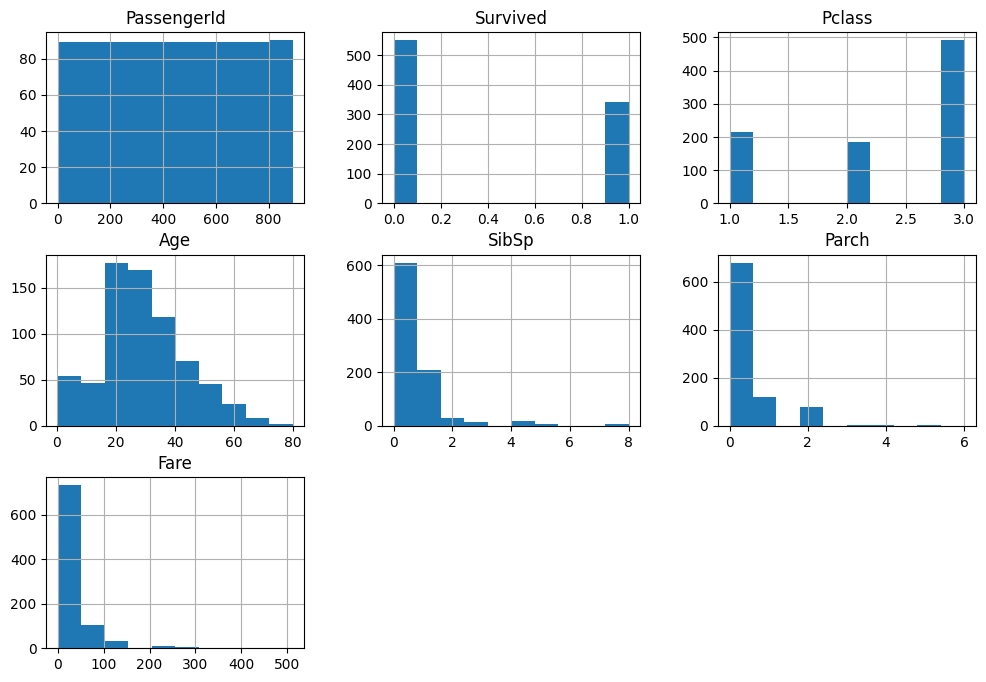

In [8]:
train.hist(figsize=(12,8));

# Comparando sobrevivência entre SEXOS com base nos dados de TRAIN

In [9]:
female = train[train['Sex'] == 'female']['Survived']
rate_fem = sum(female)/len(female)
print('% das mulheres das sobreviveram: {}'.format(rate_fem))

male = train[train['Sex'] == 'male']['Survived']
rate_male = sum(male)/len(male)
print('% dos homens que sobreviveram: {}'.format(rate_male))

% das mulheres das sobreviveram: 0.7420382165605095
% dos homens que sobreviveram: 0.18890814558058924


# Visualização da distribuição de Survived por Sex

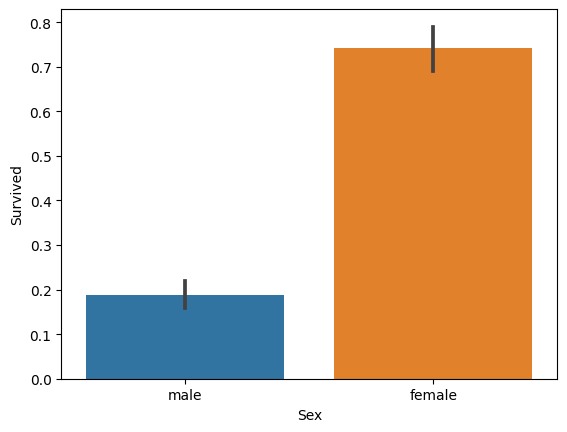

In [10]:
sns.barplot(x='Sex', y='Survived', data=train);

**Constata-se que as Mulheres haviam maior probabilidade de sobrevivência**

# E a distribuição por Classes na embarcação?

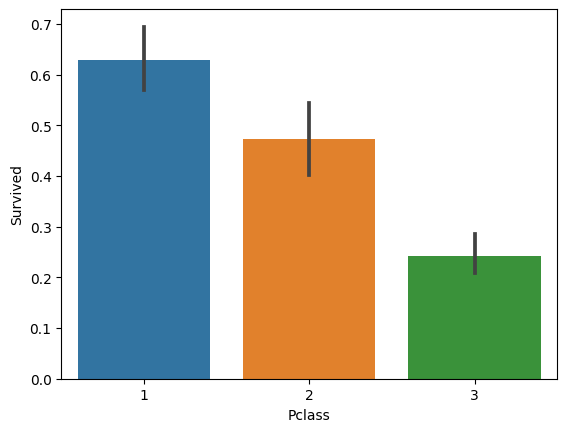

In [11]:
sns.barplot(x='Pclass', y='Survived', data=train);

**Constata-se, também, que a classe do embarcado contribuiu para maior ou menor chance de sobreviver ao disastre**

# Dropando variáveis categóricas de ambos Datasets

In [12]:
# Salvando a variável PassengerID

passengerId = test['PassengerId']


# Dropando as variáveis dos dois Datasets

train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


# Tratando os Missing Values de TRAIN e TEST

In [13]:
# 'Age'

train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)


# 'Fare'

test['Fare'].fillna(test['Fare'].median(), inplace=True)


# 'Embarked'

train.dropna(axis=0, inplace=True)


# Guardando a variável 'Suvived'

target = train['Survived']


# Tirando a variável do Datafram Train

train.drop(['Survived'], axis=1, inplace=True)


# Verificando se os Datasets possuem as mesmas features

train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True])

# Modelando variáveis

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Utilizando o LabelEncoder

# Dataset train

train['Sex'] = train[['Sex']].apply(LabelEncoder().fit_transform)
train['Embarked'] = train[['Embarked']].apply(LabelEncoder().fit_transform)

# Dataset test

test['Sex'] = test[['Sex']].apply(LabelEncoder().fit_transform)
test['Embarked'] = test[['Embarked']].apply(LabelEncoder().fit_transform)

In [16]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [17]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


# Criando o Modelo - Regressão Logística

In [18]:
# Importando a biblioteca do Modelo de Machine Learning

from sklearn.linear_model import LogisticRegression

In [19]:
# Criando o Modelo de Rl

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

LogisticRegression(solver='liblinear')

In [20]:
ac_lr = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do Modelo de Regression Logistic: {}". format(ac_lr))

Acurácia do Modelo de Regression Logistic: 80.31


# Arquivo CSV do Modelo de Predição - Regressão Logística

In [21]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({"PassengerId": passengerId,
                           "Survived": y_pred_lr})

# Gerando o arquivo

submission.to_csv('regressao_logistica.csv', index=False)

# Criando o Modelo - Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(train, target)

RandomForestClassifier(max_depth=5, random_state=1)

In [24]:
ac_rf = round(rf_model.score(train, target) * 100, 2)
print("Acurácia do Modelo de RandomForestClassifier: {}". format(ac_rf))

Acurácia do Modelo de RandomForestClassifier: 85.15


# # Arquivo CSV do Modelo de Predição - Random Forest

In [25]:
y_pred_rf = rf_model.predict(test)

submission = pd.DataFrame({"PassengerId": passengerId,
                           "Survived": y_pred_rf})

# Gerando o arquivo

submission.to_csv('random_forest.csv', index=False)